# Deep Learning week - Day 3 - Intuition on Convolutions

### Exercise objectives
- Compute convolution operations
- Visualize a convolution kernel
- VIsualize the effect of a convolution on images

<hr>
<hr>


**Convolutional Neural Networks** correspond the Neural Networks that are specially designed to work on images. 

This is made possible thanks to _convolutions_. This specific mathematical operations applies a _kernel_ to an input image and creates an output representation. The name of this output can change depending on the community. Here, let's talk about the output as it corresponds to the output of a layer, as in standard DL neurons. But it can also be "convoluted representation/feature", "convolution", or also "activation" as it corresponds to the activation of a given layer.

<img src="convolution.png" width="300">

⚠️ It is important to get that the same kernel, i.e. the same weights, are applied to different zones of the images. This is very different from standard DL operations where each weight of each neuron is related to only one input coordinate (which in this case would be each pixel). Here, the weight of a kernel is not applied to only one input, i.e. one pixel, but to different pixels, "step by step".

You can think of each kernel (or each filter in case of color image) as a magnifying glass through which you see the image. Similarly to your eyes which have to do not capture everything at once, but that have to look at different parts before to capture the whole thing you are looking at.

So let's see a bit deeper at convolutions in general, and their impact in Convolutional Neural Networks.


# Data

❓ First use the following function to load the data. 

⚠️ Restrict any desire to change the shapes or types of the outputs, this can arm further questions.

In [1]:
import os
import numpy as np

from matplotlib.pyplot import imread

import matplotlib.pyplot as plt
%matplotlib inline

def load_data(path):
    nb_circles = 100
    nb_triangles = 100
    
    X, y = [], []
    
    for i in range(nb_circles):
        c_path = os.path.join(path, 'circles', f'circle_{i}.png')
        X.append(imread(c_path)[:, :, :1])
        y.append(0)
    
    for i in range(nb_triangles):
        t_path = os.path.join(path, 'triangles', f'triangle_{i}.png')
        X.append(imread(t_path)[:, :, :1])
        y.append(1)
        
    c = list(zip(X, y))
    np.random.shuffle(c)
    X, y = zip(*c)
        
    return np.array(X), np.array(y)
        
X, y = load_data('data')

Let's inspect the data. 

❓ Check the shape of your data. Especially, why an additional dimension of size 1 for `X`? 

In [2]:
X.shape

(200, 76, 78, 1)

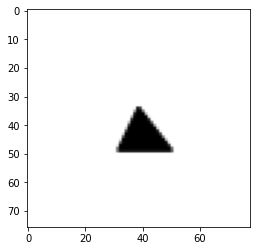

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X[2], cmap='gray')

❓ Do the input images need some normalization? If so, do it with Keras utils or by yourself.

In [4]:
# NO

❓ Display some images and their respective label (the images are black and white, therefore use `cmap=gray` in the dedicated matplotlib function - otherwise, you will get unrelevant and weird colors).

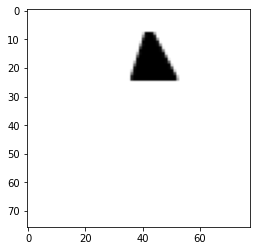

In [5]:
plt.imshow(X[0], cmap='gray')

❓ How many classes to predict are there? It should already give you an information on the last layer of your CNN.

In [6]:
# there are 2 classes

# Convolutions

The following function allows to apply a kernel to an image => a convolution. 

⚠️ Be careful though as _convolution_ operation are slighlty different in signal processing. For instance, the numpy.convolve function does not compute the convolution in the Deep Learning sense.

⚠️ Keras convolutions are a bit more complex as they deal with padding and slide. This is a simplified example.

⚠️ Be careful: convolution sometimes refers to _one_ operation. Sometimes to the operations repeated on the entire image.

❓ Load the function and go through the lines to understand what it is doing.

In [7]:
def compute_convolution(img, kernel):
    # Parameters
    kernel = np.array(kernel)
    kernel_height, kernel_width = kernel.shape

    img = np.squeeze(img) # Removes dimensions of size 1
    img_height, img_width = img.shape
    
    array = []

    for x in range(img_height-kernel_height):
        arr = []
        
        for y in range(img_width - kernel_width):
            
            a = np.multiply(img[x:x+kernel_height, y:y+kernel_width], kernel)
            arr.append(a.sum())
            
        array.append(arr)
        
    return array

❓ Apply the convolution with the following kernel to any image from the input dataset. Display the input and output image to see the difference

In [8]:
identity_kernel = [
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
]

test = compute_convolution(X[0], identity_kernel)

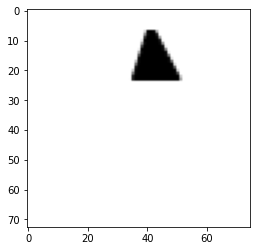

In [9]:
plt.imshow(test, cmap='gray')

The previous kernel corresponds to the _identity_ kernel, meaning that the output is equal to the output... It basically does nothing. You can easily figure this out by thinking about the operation it does on the image : only one pixel per convolution operation is kept as the other are multiplied by 0.

❓ Repeat the operation with the following function with the following kernel, once on an triangle and once on a rectangle. 

The following printing function ease the visualization. (let activation to `False`)

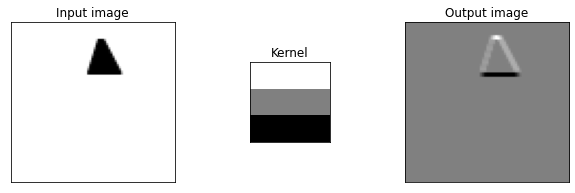

In [10]:
kernel_1 = [
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
]

def plot_convolution(img, kernel, activation=False):
    img = np.squeeze(img)
    output_img = compute_convolution(img, kernel)
    if activation:
        output_img = np.maximum(output_img, 0)
    
    plt.figure(figsize=(10, 5))
    
    ax1 = plt.subplot2grid((3,3),(0,0), rowspan=3)
    ax1.imshow(img, cmap='gray')
    ax1.title.set_text('Input image')
    
    ax2 = plt.subplot2grid((3,3),(1, 1))
    ax2.imshow(kernel, cmap='gray')
    ax2.title.set_text('Kernel')    
    
    ax3 = plt.subplot2grid((3,3),(0, 2), rowspan=3)
    ax3.imshow(output_img, cmap='gray')
    ax3.title.set_text('Output image')    

    for ax in [ax1, ax2, ax3]:
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
    
plot_convolution(X[0], kernel_1)

❓ Let's try to understand why this is meaningful. First, white colors correspond to high values and black to low values. In a neural network, just after a regular neuron or a convolution, there is an activation function. When the activation function is a `relu`, it just correponds to setting the negative values to 0.

Well, let's see what it means in the case of a CNN. Rerun the previous functions with `activation` set to `True` (in this case, the activation fuction _is_ the relu).

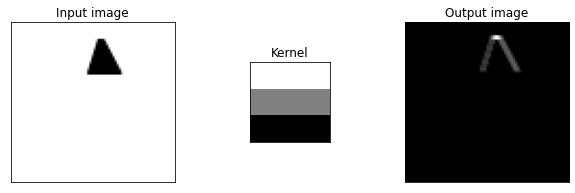

In [11]:
plot_convolution(X[0], kernel_1, activation = True)

❓ This kernel is actually highlithing the edges in a given direction. Try the next following kernels to check the different edges it can detect.

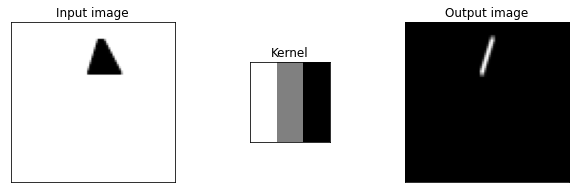

In [12]:
kernel_2 = [
    [-1, -1, -1],
    [0, 0, 0],   
    [1, 1, 1],
]

kernel_3 = [
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
]

kernel_4 = [
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
]

plot_convolution(X[0], kernel_4, activation = True)

❓ This is not always easy to understand what the kernel is going to do. Nonetheless, try different kernels to see their effect on the image. Moreover, the size of kernel before was arbitrary. You should also try to change it.

Tip: you can use the `numpy.random.uniform` function to try kernels at random.

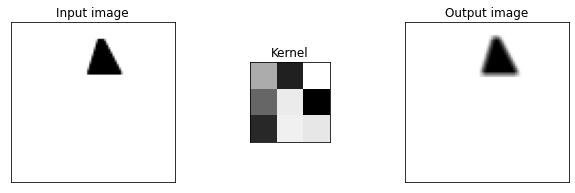

In [13]:
ker = np.random.random((3,3))
plot_convolution(X[0], ker, activation = True)

Now that you got the idea of what the convolution is doing, let's see how it goes in a real Convolutional Neural Network.

# Convolutional Neural Network


❓ Write a convolutional network that has 
- a convolutional layer with 32 filters with (5, 5) kernels.
- a convolutional layer with 64 filters with (3, 3) kernels.

After the flattening and before the last layer, you can add a Dense layer of the size of your choice - be reasonable.
And do not forget to add a max-pooling layer (with (2, 2) pool sizes) after each convolution.

Also, be sure to compile your model with the adequate parameters

In [73]:
from tensorflow.keras import layers
from tensorflow.keras import models

def initialize_model():
    model = models.Sequential()

    model.add(layers.Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(76, 78, 1)))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(54, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    ### Model compilation
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

❓ Fit the model. You should achieve a accuracy of at least 90. Here, the point is not to bother with overfitting, so do not worry much as you would have to if you have a high score. 

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [77]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10)

model = initialize_model()

history = model.fit(
    X_train, y_train,  
    batch_size = 16, 
    epochs = 30,
    verbose = 1,
    callbacks=[es]
    )

Epoch 1/30
9/9 [==============================] - 0s 45ms/step - loss: 0.7253 - accuracy: 0.5214
Epoch 2/30
9/9 [==============================] - 0s 42ms/step - loss: 0.6931 - accuracy: 0.5214
Epoch 3/30
9/9 [==============================] - 0s 40ms/step - loss: 0.6926 - accuracy: 0.5500
Epoch 4/30
9/9 [==============================] - 0s 45ms/step - loss: 0.6973 - accuracy: 0.5786
Epoch 5/30
9/9 [==============================] - 0s 42ms/step - loss: 0.6684 - accuracy: 0.5429
Epoch 6/30
9/9 [==============================] - 0s 42ms/step - loss: 0.6054 - accuracy: 0.6143
Epoch 7/30
9/9 [==============================] - 0s 40ms/step - loss: 0.5225 - accuracy: 0.7357
Epoch 8/30
9/9 [==============================] - 0s 42ms/step - loss: 0.4561 - accuracy: 0.8571
Epoch 9/30
9/9 [==============================] - 0s 42ms/step - loss: 0.4123 - accuracy: 0.8571
Epoch 10/30
9/9 [==============================] - 0s 41ms/step - loss: 0.3939 - accuracy: 0.9429
Epoch 11/30
9/9 [============

In [78]:
results = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.3364 - accuracy: 0.9000


Note about the number of kernels per filters:
- if an image has three colors, therefore three channels, the filters of the first layer will have 3 kernels. if the image has one color, the filters of the first layer will have 1 kernel only. In each case, as many kernels as channels.
- each filter of the first layer output a output which _becomes_ a channel for the next layer.

Therefore: 
- as the first layer has 32 filters, there will be 32 outputs, i.e. 32 channels
- thus, each filter of the second layer will have 32 kernels, each for a given channel of the output of the first layer

It is possible to retrieve the values of the different kernels in the CNN. Look at the following question that will return the value of a kernel depending on:
- the layer number, which can be only `0 `or `2`, as the convolution layers correspond to the first and third layer of the CNN
- the filter number, where there is 32 filters in the first convolution, and 64 filters in the second convolution
- the channel number, where there is 1 channel in the first convolution, and 32 channels in the second convolution


❓ Get some kernels and display them to see what the CNN has learnt. 

In [28]:
def get_kernel(layer_number, filter_number, channel_number):

    weight_or_bias = 0
    k = model.layers[layer_number].weights[0].numpy()[:, :, channel_number, filter_number]

    return k

kernel = get_kernel(0, 2, 0)

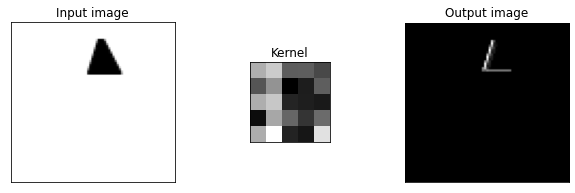

In [29]:
plot_convolution(X[0], kernel, activation = True)

❓ Display some kernels from the second convolutional layer.

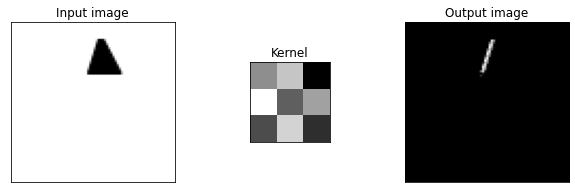

In [30]:
kernel = get_kernel(2, 3, 1)
plot_convolution(X[0], kernel, activation = True)

You can visualize the activation of the CNN after the second convolution. However, you would need to compute the activations after the first layer, then compute the MaxPooling, etc.

For these reason, we will use a function which computes the different activation through the entire network. This will ease the representation. 

⚠️ The following lines and function are using specific Keras functions and attributes. There are out of the scope of today's exercises, therefore do not spend much time trying to understand them. On the other hand, these functions might be very useful during the project weeks as there happens to be projects related to imaging data. In such situation, you can come back to the following code to better understand it ;)

❓ Run the following cell. The function allows to directly print the activation after the second layer

In [31]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X) 


def get_activation(activations, image_number, layer_number, filter_number):
    return activations[layer_number][image_number][:, :, filter_number]

❓ Display the output after the second convolution layer - choose any image and filter number. You can play around to see how the information of an image _flows_ within the network.

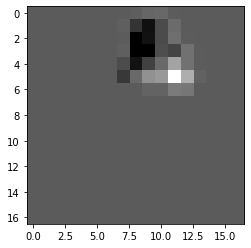

In [65]:
plt.imshow(get_activation(activations, 0, 3, 0), cmap = 'gray')

❓ Now, you have all the tools to go a step further. Here, re-initialize a new CNN but with 4 convolution layers. The different parameters are up to you to choose. Once fit on your data, observe the activation throughout the network to see how the input images are transformed after the convolutions.

In [81]:
def initialize_model():
    model = models.Sequential()

    model.add(layers.Conv2D(8, kernel_size=(5,5), activation='relu', input_shape=(76, 78, 1)))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(12, kernel_size=(4,4), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(16, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(10, kernel_size=(2,2), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    ### Model compilation
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [82]:
es = EarlyStopping(patience=10)

model = initialize_model()

history = model.fit(
    X_train, y_train,  
    batch_size = 16, 
    epochs = 100,
    verbose = 1
    )

Epoch 1/100
9/9 [==============================] - 0s 23ms/step - loss: 0.7047 - accuracy: 0.5000
Epoch 2/100
9/9 [==============================] - 0s 24ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 3/100
9/9 [==============================] - 0s 25ms/step - loss: 0.6679 - accuracy: 0.7714
Epoch 4/100
9/9 [==============================] - 0s 19ms/step - loss: 0.6356 - accuracy: 0.7857
Epoch 5/100
9/9 [==============================] - 0s 24ms/step - loss: 0.5838 - accuracy: 0.7714
Epoch 6/100
9/9 [==============================] - 0s 22ms/step - loss: 0.4670 - accuracy: 0.8714
Epoch 7/100
9/9 [==============================] - 0s 23ms/step - loss: 0.3545 - accuracy: 0.8857
Epoch 8/100
9/9 [==============================] - 0s 20ms/step - loss: 0.2671 - accuracy: 0.9286
Epoch 9/100
9/9 [==============================] - 0s 23ms/step - loss: 0.2064 - accuracy: 0.9286
Epoch 10/100
9/9 [==============================] - 0s 20ms/step - loss: 0.1458 - accuracy: 0.9429
Epoch 11/100
9/9 [=

In [83]:
results = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.4442 - accuracy: 0.8833


Now, you should get a better understanding of what the convolutions are doing and how the related information thus flows within the neural network in order to obtain accurate prediction. 

# Miscellaneous

The following simply presents the functions that created the dataset you are working with.

They were left at the end of the notebook in case you want to further prototype and get better understanding of what is going on. But do not prototype yet => you can go to the next exercise as for now, and come back to it any time later.

In [21]:
def draw_triangle():
    dx = np.random.uniform(0.1, 0.3)
    dy = np.random.uniform(0.1, 0.3)
    noise_x = np.random.uniform(0.0, 0.1)
    noise_y = np.random.uniform(0.0, 0.1)    
    
    x = np.random.uniform(0, 1-dx-noise_x)
    y = np.random.uniform(0, 1-dy)
    X = np.array([[x,y], [x+dx+noise_x,y], [x+dx/2, y+dy+noise_y]])

    t1 = plt.Polygon(X, color='black')
    plt.gca().add_patch(t1)
    
def draw_circle():
    r = np.random.uniform(0.1, 0.25)
    x = np.random.uniform(0+r, 1-r)
    y = np.random.uniform(0+r, 1-r)

    circle1 = plt.Circle((x, y), r, color='black')
    plt.gcf().gca().add_artist(circle1)
    
def create_image(form, path):
    plt.figure(figsize=(1, 1))
    if form == 'circle':
        draw_circle()
    elif form == 'triangle':
        draw_triangle()
    plt.axis('off')
    plt.savefig(path, dpi=80, bbox_inches='tight')
    plt.close()

    
def create_images(path):
    nb_circles = 100
    nb_triangles = 100
    
    for i in range(nb_circles):
        c_path = os.path.join(path, 'circles', f'circle_{i}.png')
        create_image('circle', c_path)
        
    for i in range(nb_triangles):
        t_path = os.path.join(path, 'triangles', f'triangle_{i}.png')
        create_image('triangle', t_path)